In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

from sklearn import svm 
from sklearn.svm import SVC

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Assignment 2/data.csv')

print("To get an overview of the data:")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
To get an overview of the data:


quality  bits  intra_parts  ...   cost_1   cost_2  relevant
0       22  2143            0  ...      0.0      0.0       1.0
1       22  1735            0  ...   8816.0   8801.0       1.0
2       22  1971            0  ...   5104.0   5193.0       1.0
3       22  2473            0  ...  21531.0  19802.0       1.0
4       22  1093            0  ...  15073.0  14549.0       1.0

[5 rows x 27 columns]

In [3]:
print("Number of rows:")
print(len(df))

print("-------------------------------------------------")
print("Column Types:")
df.dtypes



Number of rows:
16000
-------------------------------------------------
Column Types:


quality                int64
bits                   int64
intra_parts            int64
skip_parts             int64
inter_16x16_parts      int64
inter_4x4_parts        int64
inter_other_parts      int64
non_zero_pixels        int64
frame_width            int64
frame_height           int64
movement_level         int64
mean                 float64
sub_mean_1           float64
sub_mean_2           float64
sub_mean_3           float64
sub_mean_4           float64
var_sub_blocks       float64
sobel_h              float64
sobel_v              float64
variance             float64
block_movement_h     float64
block_movement_v     float64
var_movement_h       float64
var_movement_v       float64
cost_1               float64
cost_2               float64
relevant             float64
dtype: object

Number of null values in each column:


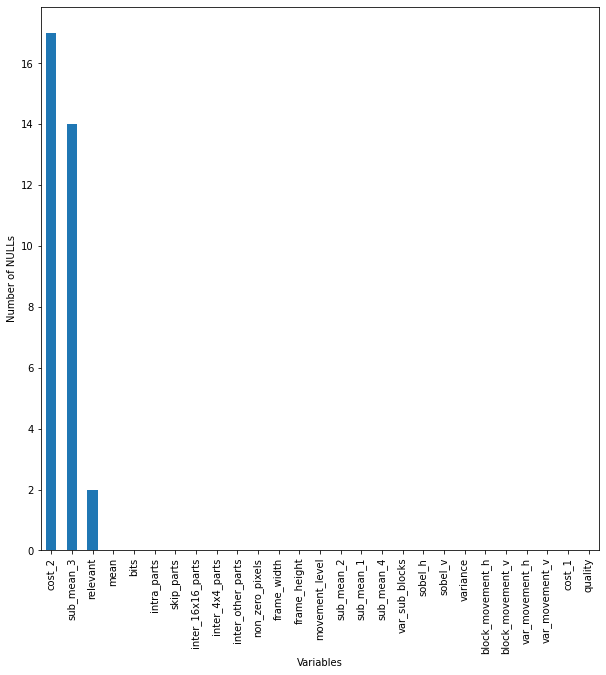

In [4]:
print("Number of null values in each column:")
(df.isnull().sum()).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))
plt.xlabel('Variables')
plt.ylabel('Number of NULLs')
plt.show()

In [5]:
print("Description of each column:")
df.describe()


Description of each column:


quality          bits  ...         cost_2      relevant
count  16000.000000  16000.000000  ...   15983.000000  15998.000000
mean      29.500000    449.837312  ...   42059.829569      0.822353
std        5.590345    549.338243  ...   43844.708679      0.382227
min       22.000000      0.000000  ...       0.000000      0.000000
25%       25.750000     72.000000  ...   10965.000000      1.000000
50%       29.500000    243.000000  ...   26135.000000      1.000000
75%       33.250000    622.000000  ...   59876.500000      1.000000
max       37.000000   4771.000000  ...  446306.000000      1.000000

[8 rows x 27 columns]

In [6]:
print("Number of unique elements in each column:")
df.nunique()

Number of unique elements in each column:


quality                  4
bits                  2106
intra_parts             15
skip_parts               5
inter_16x16_parts        5
inter_4x4_parts         12
inter_other_parts       28
non_zero_pixels        568
frame_width              4
frame_height             4
movement_level         205
mean                  6599
sub_mean_1            3123
sub_mean_2            3022
sub_mean_3            3072
sub_mean_4            2975
var_sub_blocks       11457
sobel_h               9908
sobel_v               9896
variance             12001
block_movement_h      2368
block_movement_v      2221
var_movement_h        8427
var_movement_v        8450
cost_1               14378
cost_2               14538
relevant                 2
dtype: int64

-------------------------------------------------
Correlations of variables with the target variable:
                   relevant
relevant           1.000000
bits               0.252393
non_zero_pixels    0.236884
sobel_v            0.197248
inter_other_parts  0.195646
sobel_h            0.194505
sub_mean_4         0.179225
sub_mean_3         0.151905
sub_mean_1         0.141184
sub_mean_2         0.138525
inter_4x4_parts    0.114044
variance           0.102842
cost_1             0.079386
intra_parts        0.075806
cost_2             0.075446
block_movement_v   0.067436
var_sub_blocks     0.054598
mean               0.028971
var_movement_v     0.015649
block_movement_h   0.009136
inter_16x16_parts -0.010243
var_movement_h    -0.016549
movement_level    -0.085982
frame_height      -0.137324
frame_width       -0.148213
skip_parts        -0.241371
quality           -0.250797
-------------------------------------------------


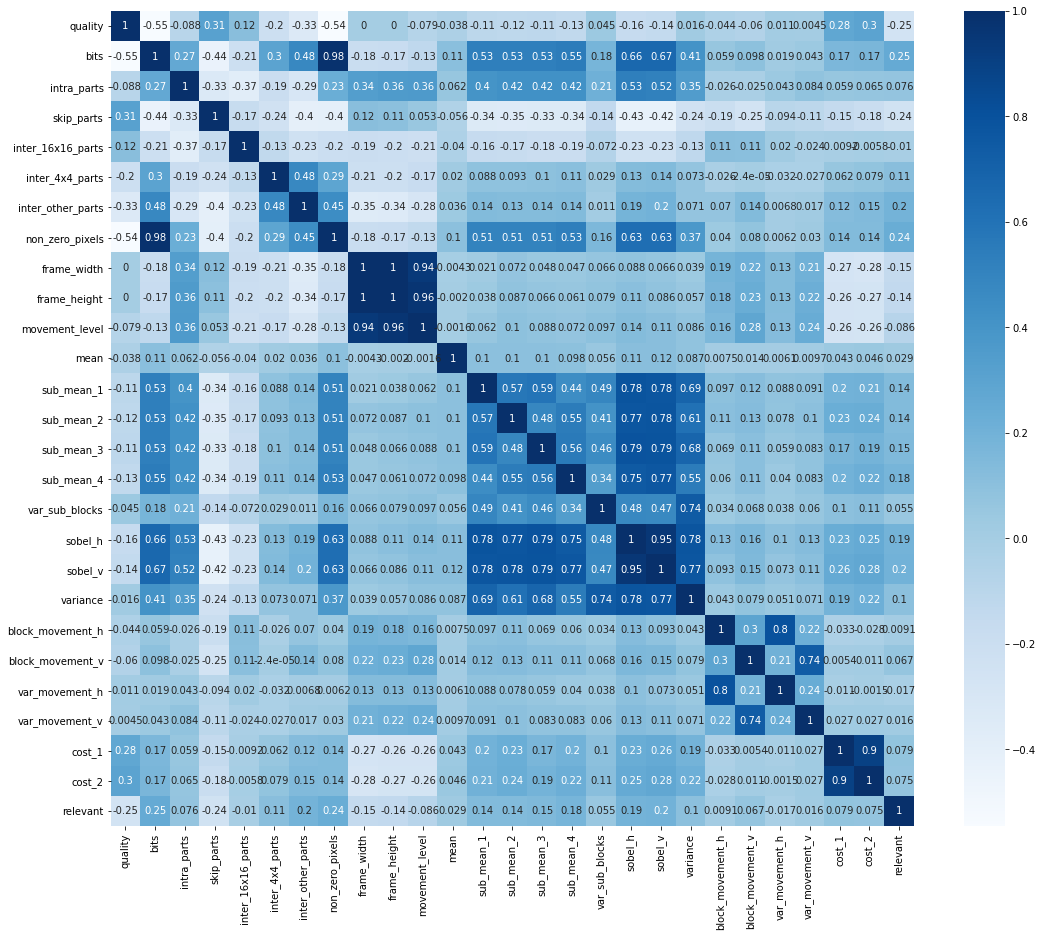

quality              0.250797
bits                 0.252393
skip_parts           0.241371
inter_other_parts    0.195646
non_zero_pixels      0.236884
sub_mean_3           0.151905
sub_mean_4           0.179225
sobel_h              0.194505
sobel_v              0.197248
relevant             1.000000
Name: relevant, dtype: float64

In [7]:
print("-------------------------------------------------")
print("Correlations of variables with the target variable:")
cor = df.corr()
print(cor.sort_values(by=["relevant"], ascending=False).filter(items=["relevant"]))

print("-------------------------------------------------")
plt.figure(figsize=(18,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()
cor_target = abs(cor["relevant"])
relevant_features = cor_target[cor_target>0.15]
relevant_features

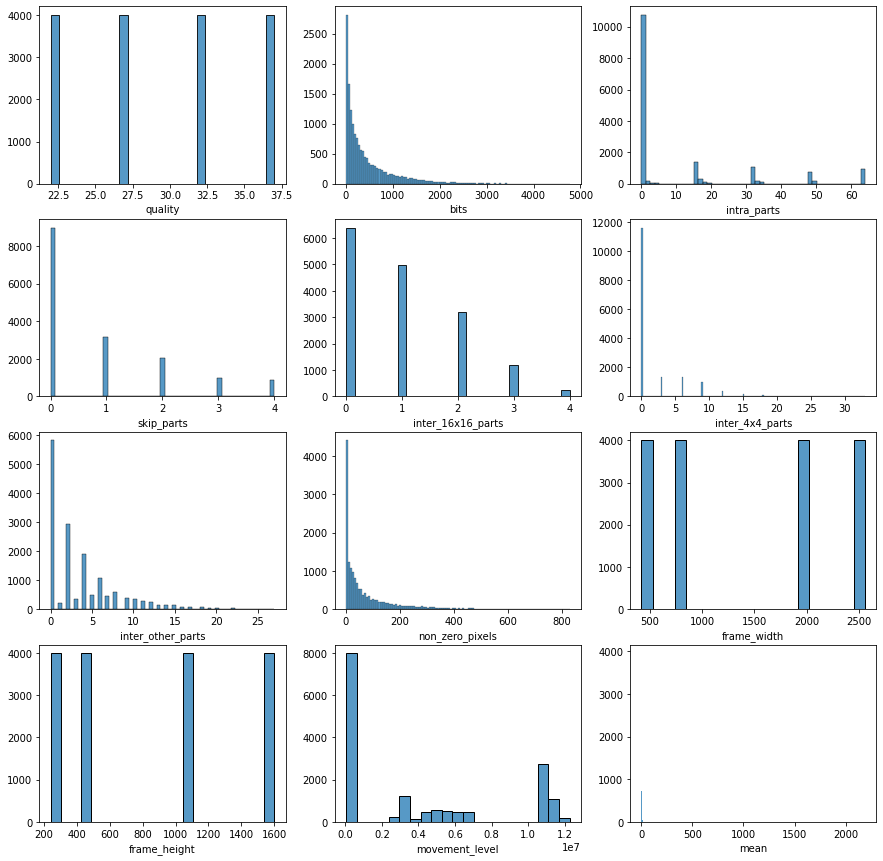

In [8]:
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

for ax,feat in zip(axes.flatten(), list(df.columns.values)):
    sns.histplot(df, x=feat, ax=ax)
    ax.set(ylabel = '')

In [9]:
df["cost_2"].fillna(df["cost_2"].mean(), inplace=True)
df["sub_mean_3"].fillna(df["sub_mean_3"].mean(), inplace=True)
df_NullReplac=df
df_NoNull=df_NullReplac.dropna()
print("Number of rows:")
print(len(df_NoNull))

Number of rows:
15998


Percent of relevant:  82.24 %
Percent of not relevant:  17.76 %
Class 0: 2842
Class 1: 13156
Proportion: 0.22 : 1


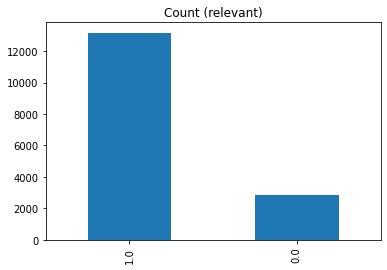

In [10]:
print('Percent of relevant: ',
      round(len(df_NoNull[df_NoNull['relevant']==1])/len(df_NoNull['relevant'])*100,2),
      "%")
print('Percent of not relevant: ',
      round(len(df_NoNull[df_NoNull['relevant']==0])/len(df_NoNull['relevant'])*100,2),
      "%")

target_count = df_NoNull.relevant.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (relevant)');

Random under-sampling:
0.0    2842
1.0    2842
Name: relevant, dtype: int64


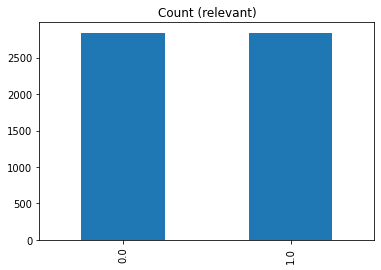

In [11]:
# Class count
count_class_relevant, count_class_NoRelevant = df_NoNull.relevant.value_counts()

# Divide by class
df_class_NoRelevant = df_NoNull[df_NoNull['relevant'] == 0]
df_class_relevant = df_NoNull[df_NoNull['relevant'] == 1]
#print('Class 0:', df_class_NoRelevant)
#print('Class 1:', df_class_relevant)

df_class_relevant_under = df_class_relevant.sample(count_class_NoRelevant,random_state=1)
df_test_under = pd.concat([df_class_relevant_under, df_class_NoRelevant], axis=0)

print('Random under-sampling:')
print(df_test_under.relevant.value_counts())


df_test_under.relevant.value_counts().plot(kind='bar', title='Count (relevant)');


In [12]:
df_Balanced=df_test_under
print(df_Balanced)


       quality  bits  intra_parts  ...   cost_1   cost_2  relevant
5655        27   118            0  ...   4600.0   5978.0       1.0
2202        32    17            0  ...   2508.0  13231.0       1.0
14924       32   108            0  ...   7652.0  12854.0       1.0
6242        32   284           16  ...  12243.0  11999.0       1.0
11880       37   194           48  ...   7557.0   6369.0       1.0
...        ...   ...          ...  ...      ...      ...       ...
15988       37    11           16  ...  26392.0  27750.0       0.0
15989       37    34           17  ...  25233.0  23965.0       0.0
15990       37    23            0  ...  12558.0  10574.0       0.0
15992       37    73           16  ...   5557.0   4284.0       0.0
15993       37   127           17  ...  16188.0  23974.0       0.0

[5684 rows x 27 columns]


In [13]:
class_col = df_Balanced.pop('relevant')

In [14]:
dfStandardized = pd.DataFrame(StandardScaler().fit_transform(df_Balanced), columns = df_Balanced.columns)
dfStandardized.describe().round(2)
print("Number of rows:")
print(len(dfStandardized))

Number of rows:
5684


*   df_NoNull is the data without standardization
*   dfStandardized is the data with standardization

#1. Build model without Standardization nor FSS



In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(df_Balanced,class_col, test_size= 0.2, random_state = 1)

##1.1 Decisions Tree

In [16]:
tree=DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5,max_depth=5,random_state=1)
tree.fit(X_train,Y_train)
Y_pred_tree = tree.predict(X_test)

conf_tree=pd.DataFrame(confusion_matrix(Y_test,Y_pred_tree),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_tree)
print(classification_report(Y_test,Y_pred_tree))


       predicted0  predicted1
true0         408         156
true1         188         385
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       564
         1.0       0.71      0.67      0.69       573

    accuracy                           0.70      1137
   macro avg       0.70      0.70      0.70      1137
weighted avg       0.70      0.70      0.70      1137



##1.2 Random Forest


In [17]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)
conf_rf=pd.DataFrame(confusion_matrix(Y_test,y_pred_rf),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_rf)
print(classification_report(Y_test,y_pred_rf))

       predicted0  predicted1
true0         409         155
true1         180         393
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       564
         1.0       0.72      0.69      0.70       573

    accuracy                           0.71      1137
   macro avg       0.71      0.71      0.71      1137
weighted avg       0.71      0.71      0.71      1137



#2. Build model with Standardization without FSS


In [18]:
X_train_standardized, X_test_standardized, Y_train_standardized, Y_test_standardized = train_test_split(dfStandardized,class_col, test_size= 0.2, random_state = 1)

##2.1 Decisions Tree

In [19]:
tree_standardized=DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5,max_depth=5,random_state=1)
tree_standardized.fit(X_train_standardized,Y_train_standardized)
Y_pred_tree_standardized = tree_standardized.predict(X_test_standardized)
conf_tree_standardized=pd.DataFrame(confusion_matrix(Y_test_standardized,Y_pred_tree_standardized),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_tree_standardized)
print(classification_report(Y_test_standardized,Y_pred_tree_standardized))

       predicted0  predicted1
true0         408         156
true1         188         385
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       564
         1.0       0.71      0.67      0.69       573

    accuracy                           0.70      1137
   macro avg       0.70      0.70      0.70      1137
weighted avg       0.70      0.70      0.70      1137



##2.2 Random Forest

In [20]:
rf_standardized=RandomForestClassifier(n_estimators=100,random_state=1)
rf_standardized.fit(X_train_standardized,Y_train_standardized)
y_pred_rf_standardized = rf_standardized.predict(X_test_standardized)
conf_rf_standardized=pd.DataFrame(confusion_matrix(Y_test_standardized,y_pred_rf_standardized),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_rf_standardized)
print(classification_report(Y_test_standardized,y_pred_rf_standardized))

       predicted0  predicted1
true0         409         155
true1         179         394
              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71       564
         1.0       0.72      0.69      0.70       573

    accuracy                           0.71      1137
   macro avg       0.71      0.71      0.71      1137
weighted avg       0.71      0.71      0.71      1137



#3. Build model with Standardization with FSS

##3.1 Decisions Tree

###3.1.1 KBest

In [21]:
fs_k_best_chi2 = SelectKBest(chi2, k=4)
fs_k_best_chi2.fit(dfStandardized.abs(), class_col)
col_filter = fs_k_best_chi2.get_support()
df_fs_k_best_chi2 = dfStandardized.iloc[:, col_filter]
df_fs_k_best_chi2

bits  inter_other_parts  non_zero_pixels  sub_mean_4
0    -0.465488          -0.487458        -0.499601   -0.603517
1    -0.675875          -0.731423        -0.624350   -0.603517
2    -0.486318           0.244437        -0.590327   -0.260693
3    -0.119702          -0.731423        -0.170717    1.268593
4    -0.307176          -0.731423        -0.408874    0.574683
...        ...                ...              ...         ...
5679 -0.688374          -0.731423        -0.624350   -0.603517
5680 -0.640464          -0.731423        -0.624350   -0.603517
5681 -0.663377          -0.731423        -0.624350   -0.603517
5682 -0.559225          -0.731423        -0.533623   -0.107868
5683 -0.446740          -0.243493        -0.340829   -0.603517

[5684 rows x 4 columns]

In [22]:
X_train_FS_K_best, X_test_FS_K_best, Y_train_FS_K_best, Y_test_FS_K_best = train_test_split(df_fs_k_best_chi2,class_col, test_size= 0.2, random_state = 1)
tree_sta_FS_K_best=DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5,max_depth=5,random_state=1)
tree_sta_FS_K_best.fit(X_train_FS_K_best,Y_train_FS_K_best)
Y_pred_tree_sta_FS_K_best = tree_sta_FS_K_best.predict(X_test_FS_K_best)

conf_tree_sta_FS_K_best=pd.DataFrame(confusion_matrix(Y_test_FS_K_best,Y_pred_tree_sta_FS_K_best),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_tree_sta_FS_K_best)
print(classification_report(Y_test_FS_K_best,Y_pred_tree_sta_FS_K_best))

       predicted0  predicted1
true0         421         143
true1         231         342
              precision    recall  f1-score   support

         0.0       0.65      0.75      0.69       564
         1.0       0.71      0.60      0.65       573

    accuracy                           0.67      1137
   macro avg       0.68      0.67      0.67      1137
weighted avg       0.68      0.67      0.67      1137



###3.1.2 Percentile

In [23]:
fs_Perc = SelectPercentile(mutual_info_classif, percentile=40)
fs_Perc.fit(dfStandardized, class_col)
col_filter = fs_Perc.get_support()
df_Fs_Perc = dfStandardized.iloc[:, col_filter]
df_Fs_Perc

bits  skip_parts  inter_other_parts  ...  sub_mean_4   sobel_h   sobel_v
0    -0.465488   -0.063177          -0.487458  ...   -0.603517 -0.551990 -0.561565
1    -0.675875    1.494734          -0.731423  ...   -0.603517 -0.749053 -0.758236
2    -0.486318   -0.063177           0.244437  ...   -0.260693 -0.662332 -0.652713
3    -0.119702   -0.842133          -0.731423  ...    1.268593  0.736007  0.623795
4    -0.307176   -0.842133          -0.731423  ...    0.574683  0.440300  0.144532
...        ...         ...                ...  ...         ...       ...       ...
5679 -0.688374    1.494734          -0.731423  ...   -0.603517 -0.768624 -0.765205
5680 -0.640464   -0.063177          -0.731423  ...   -0.603517 -0.768624 -0.765205
5681 -0.663377    0.715778          -0.731423  ...   -0.603517 -0.736905 -0.591185
5682 -0.559225    0.715778          -0.731423  ...   -0.107868 -0.323658 -0.045604
5683 -0.446740   -0.842133          -0.243493  ...   -0.603517 -0.212978 -0.033843

[5684 rows x 10 columns]

In [24]:
X_train_FS_Perc, X_test_FS_Perc, Y_train_FS_Perc, Y_test_FS_Perc = train_test_split(df_Fs_Perc,class_col, test_size= 0.2, random_state = 1)
tree_sta_FS_Perc=DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5,max_depth=5,random_state=1)
tree_sta_FS_Perc.fit(X_train_FS_Perc,Y_train_FS_Perc)
Y_pred_tree_sta_FS_Perc = tree_sta_FS_Perc.predict(X_test_FS_Perc)

conf_tree_sta_FS_Perc=pd.DataFrame(confusion_matrix(Y_test_FS_Perc,Y_pred_tree_sta_FS_Perc),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_tree_sta_FS_Perc)
print(classification_report(Y_test_FS_Perc,Y_pred_tree_sta_FS_Perc))

       predicted0  predicted1
true0         427         137
true1         204         369
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.71       564
         1.0       0.73      0.64      0.68       573

    accuracy                           0.70      1137
   macro avg       0.70      0.70      0.70      1137
weighted avg       0.70      0.70      0.70      1137



###3.1.3 Manual FSS according to Correlations

In [25]:
df_manual = dfStandardized[[
  "quality",
  "bits",
  "skip_parts",
  "inter_other_parts",
  "non_zero_pixels",
  "sub_mean_3",
  "sub_mean_4",
  "sobel_h",
  "sobel_v"]]
print(df_manual.head())
X_train_FS_manual, X_test_FS_manual, Y_train_FS_manual, Y_test_FS_manual = train_test_split(df_manual,class_col, test_size= 0.2, random_state = 1)
tree_sta_FS_manual=DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5,max_depth=5,random_state=1)
tree_sta_FS_manual.fit(X_train_FS_manual,Y_train_FS_manual)
Y_pred_tree_sta_FS_manual = tree_sta_FS_manual.predict(X_test_FS_manual)

conf_tree_sta_FS_manual=pd.DataFrame(confusion_matrix(Y_test_FS_manual,Y_pred_tree_sta_FS_manual),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_tree_sta_FS_manual)
print(classification_report(Y_test_FS_manual,Y_pred_tree_sta_FS_manual))

    quality      bits  skip_parts  ...  sub_mean_4   sobel_h   sobel_v
0 -0.657074 -0.465488   -0.063177  ...   -0.603517 -0.551990 -0.561565
1  0.242880 -0.675875    1.494734  ...   -0.603517 -0.749053 -0.758236
2  0.242880 -0.486318   -0.063177  ...   -0.260693 -0.662332 -0.652713
3  0.242880 -0.119702   -0.842133  ...    1.268593  0.736007  0.623795
4  1.142834 -0.307176   -0.842133  ...    0.574683  0.440300  0.144532

[5 rows x 9 columns]
       predicted0  predicted1
true0         418         146
true1         209         364
              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70       564
         1.0       0.71      0.64      0.67       573

    accuracy                           0.69      1137
   macro avg       0.69      0.69      0.69      1137
weighted avg       0.69      0.69      0.69      1137



##3.2 Random Forest

###3.2.1 KBest



In [26]:
X_train_FS_K_best, X_test_FS_K_best, Y_train_FS_K_best, Y_test_FS_K_best = train_test_split(df_fs_k_best_chi2,class_col, test_size= 0.2, random_state = 1)
rf_sta_FS_K_best=RandomForestClassifier(n_estimators=100,random_state=1)
rf_sta_FS_K_best.fit(X_train_FS_K_best,Y_train_FS_K_best)
y_pred_rf_sta_FS_K_best = rf_sta_FS_K_best.predict(X_test_FS_K_best)
conf_rf_sta_FS_K_best=pd.DataFrame(confusion_matrix(Y_test_FS_K_best,y_pred_rf_sta_FS_K_best),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_rf_sta_FS_K_best)
print(classification_report(Y_test_FS_K_best,y_pred_rf_sta_FS_K_best))

       predicted0  predicted1
true0         390         174
true1         194         379
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68       564
         1.0       0.69      0.66      0.67       573

    accuracy                           0.68      1137
   macro avg       0.68      0.68      0.68      1137
weighted avg       0.68      0.68      0.68      1137



###3.2.2 Percentile


In [27]:
X_train_FS_Perc, X_test_FS_Perc, Y_train_FS_Perc, Y_test_FS_Perc = train_test_split(df_Fs_Perc,class_col, test_size= 0.2, random_state = 1)
rf_sta_FS_Perc=RandomForestClassifier(n_estimators=100,random_state=1)
rf_sta_FS_Perc.fit(X_train_FS_Perc,Y_train_FS_Perc)
y_pred_rf_sta_FS_Perc = rf_sta_FS_Perc.predict(X_test_FS_Perc)
conf_rf_sta_FS_Perc=pd.DataFrame(confusion_matrix(Y_test_FS_Perc,y_pred_rf_sta_FS_Perc),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_rf_sta_FS_Perc)
print(classification_report(Y_test_FS_Perc,y_pred_rf_sta_FS_Perc))

       predicted0  predicted1
true0         389         175
true1         183         390
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68       564
         1.0       0.69      0.68      0.69       573

    accuracy                           0.69      1137
   macro avg       0.69      0.69      0.69      1137
weighted avg       0.69      0.69      0.69      1137



###3.2.3 Manual FSS according to Correlations

In [28]:
df_manual = dfStandardized[[
  "quality",
  "bits",
  "skip_parts",
  "inter_other_parts",
  "non_zero_pixels",
  "sub_mean_3",
  "sub_mean_4",
  "sobel_h",
  "sobel_v"]]
print(df_manual.head())
X_train_FS_manual, X_test_FS_manual, Y_train_FS_manual, Y_test_FS_manual = train_test_split(df_manual,class_col, test_size= 0.2, random_state = 1)
rf_sta_FS_manual=RandomForestClassifier(n_estimators=100,random_state=1)
rf_sta_FS_manual.fit(X_train_FS_manual,Y_train_FS_manual)
y_pred_rf_sta_FS_manual = rf_sta_FS_manual.predict(X_test_FS_manual)
conf_rf_sta_FS_manual=pd.DataFrame(confusion_matrix(Y_test_FS_manual,y_pred_rf_sta_FS_manual),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_rf)
print(classification_report(Y_test_FS_manual,y_pred_rf_sta_FS_manual))

    quality      bits  skip_parts  ...  sub_mean_4   sobel_h   sobel_v
0 -0.657074 -0.465488   -0.063177  ...   -0.603517 -0.551990 -0.561565
1  0.242880 -0.675875    1.494734  ...   -0.603517 -0.749053 -0.758236
2  0.242880 -0.486318   -0.063177  ...   -0.260693 -0.662332 -0.652713
3  0.242880 -0.119702   -0.842133  ...    1.268593  0.736007  0.623795
4  1.142834 -0.307176   -0.842133  ...    0.574683  0.440300  0.144532

[5 rows x 9 columns]
       predicted0  predicted1
true0         409         155
true1         180         393
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68       564
         1.0       0.68      0.66      0.67       573

    accuracy                           0.67      1137
   macro avg       0.67      0.67      0.67      1137
weighted avg       0.67      0.67      0.67      1137



#4. Build model Corss-Validation(Beta)


##4.1 Decision Tree(Original data)

1) Determine criterion parameters (decision tree division criteria)

In [29]:
X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(df_Balanced,class_col, test_size= 0.2, random_state = 1)
ScoreAll = []
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
score1 = cross_val_score(clf, X_train_cv, Y_train_cv, cv=cv).mean()
print(score1)
clf = DecisionTreeClassifier(criterion='gini', random_state=1)
score2 = cross_val_score(clf, X_train_cv, Y_train_cv, cv=cv).mean()
print(score2)

if score1>score2:
  best_criterion='entropy'
else:
  best_criterion='gini'

print(best_criterion)

0.6463500439753738
0.6437994722955145
entropy


So the 'gini' is better

2) Narrow the search for max_depth (the maximum depth of the tree) by plotting the score curve to get the best max_depth

Best max_depth: [3.         0.70932278]


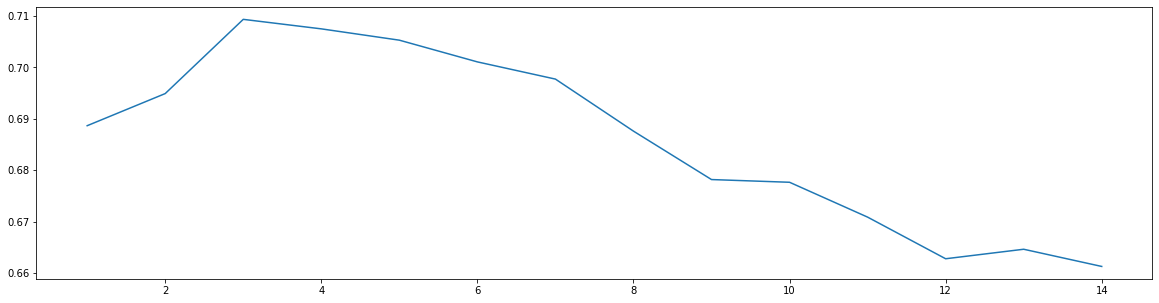

3


In [30]:
ScoreAll = []
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
for i in range(1,15):
    clf = DecisionTreeClassifier(criterion=best_criterion,max_depth=i,random_state=1)
    score = cross_val_score(clf, X_train_cv, Y_train_cv, cv=cv).mean()
    ScoreAll.append([i, score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:, 1]))[0][0]
print("Best max_depth:", ScoreAll[max_score])

plt.figure(figsize=[20, 5])
plt.plot(ScoreAll[:, 0], ScoreAll[:, 1])
plt.show()


best_max_depth=int(ScoreAll[max_score][0])
print(best_max_depth)

3) Using the max_depth parameter, plot the curve and observe the score as min_samples_split

Best min_samples_split: [2.         0.70932278]


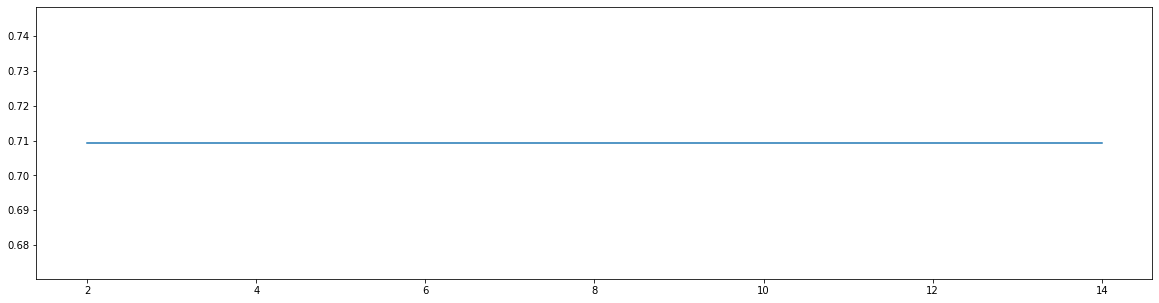

2


In [31]:
ScoreAll = []
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
for i in range(2,15):
    clf = DecisionTreeClassifier(criterion=best_criterion,max_depth=best_max_depth, min_samples_split=i, random_state=1)
    score = cross_val_score(clf, X_train_cv, Y_train_cv, cv=cv).mean()
    ScoreAll.append([i, score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:, 1]))[0][0]
print("Best min_samples_split:", ScoreAll[max_score])
plt.figure(figsize=[20, 5])
plt.plot(ScoreAll[:, 0], ScoreAll[:, 1])
plt.show()

best_min_samples_split=int(ScoreAll[max_score][0])
print(best_min_samples_split)

4) Using the max_depth and min_samples_split parameters, the curve is plotted and the score is observed as min_samples_leaf

Best min_samples_leaf: [2.         0.70932278]


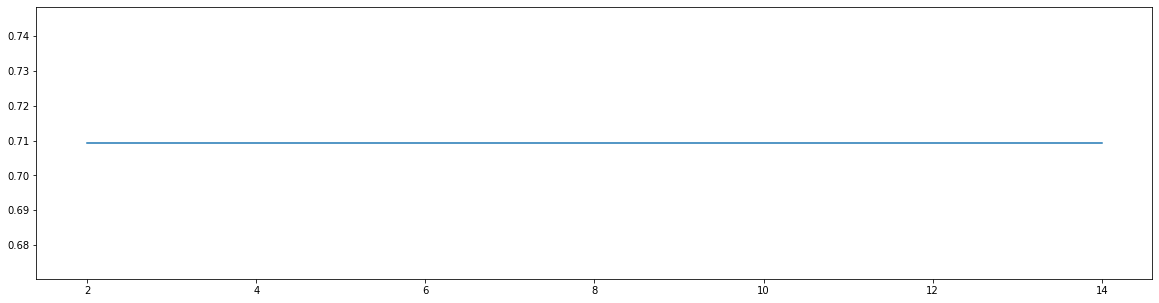

2


In [32]:
ScoreAll = []
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
for i in range(2,15):
    clf = DecisionTreeClassifier(criterion=best_criterion,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=i, random_state=1)
    score = cross_val_score(clf, X_train_cv, Y_train_cv, cv=cv).mean()
    ScoreAll.append([i, score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:, 1]))[0][0]
print("Best min_samples_leaf:", ScoreAll[max_score])
plt.figure(figsize=[20, 5])
plt.plot(ScoreAll[:, 0], ScoreAll[:, 1])
plt.show()

best_min_samples_leaf=int(ScoreAll[max_score][0])
print(best_min_samples_leaf)

In [33]:
tree_cv=DecisionTreeClassifier(criterion=best_criterion,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_depth=best_max_depth,random_state=1)
tree_cv.fit(X_train_cv,Y_train_cv)
tree_cv
Y_pred_tree_cv = tree_cv.predict(X_test_cv)

conf_tree_cv=pd.DataFrame(confusion_matrix(Y_test_cv,Y_pred_tree_cv),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_tree_cv)
print(classification_report(Y_test_cv,Y_pred_tree_cv))

       predicted0  predicted1
true0         422         142
true1         214         359
              precision    recall  f1-score   support

         0.0       0.66      0.75      0.70       564
         1.0       0.72      0.63      0.67       573

    accuracy                           0.69      1137
   macro avg       0.69      0.69      0.69      1137
weighted avg       0.69      0.69      0.69      1137



##4.2 Decisions Tree(FSS manually and Standardized)

In [34]:
df_manual = dfStandardized[[
  "quality",
  "bits",
  "skip_parts",
  "inter_other_parts",
  "non_zero_pixels",
  "sub_mean_3",
  "sub_mean_4",
  "sobel_h",
  "sobel_v"]]
print(df_manual.head())
X_train_std_fs_cv, X_test_std_fs_cv, Y_train_std_fs_cv, Y_test_std_fs_cv = train_test_split(df_manual,class_col, test_size= 0.2, random_state = 1)
ScoreAll = []
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
score1 = cross_val_score(clf, X_train_std_fs_cv, Y_train_std_fs_cv, cv=cv).mean()
print(score1)
clf = DecisionTreeClassifier(criterion='gini', random_state=1)
score2 = cross_val_score(clf, X_train_std_fs_cv, Y_train_std_fs_cv, cv=cv).mean()
print(score2)

if score1>score2:
  best_criterion='entropy'
else:
  best_criterion='gini'
print(best_criterion)

    quality      bits  skip_parts  ...  sub_mean_4   sobel_h   sobel_v
0 -0.657074 -0.465488   -0.063177  ...   -0.603517 -0.551990 -0.561565
1  0.242880 -0.675875    1.494734  ...   -0.603517 -0.749053 -0.758236
2  0.242880 -0.486318   -0.063177  ...   -0.260693 -0.662332 -0.652713
3  0.242880 -0.119702   -0.842133  ...    1.268593  0.736007  0.623795
4  1.142834 -0.307176   -0.842133  ...    0.574683  0.440300  0.144532

[5 rows x 9 columns]
0.629287598944591
0.6257695690413368
entropy


Best max_depth: [3.         0.70184697]


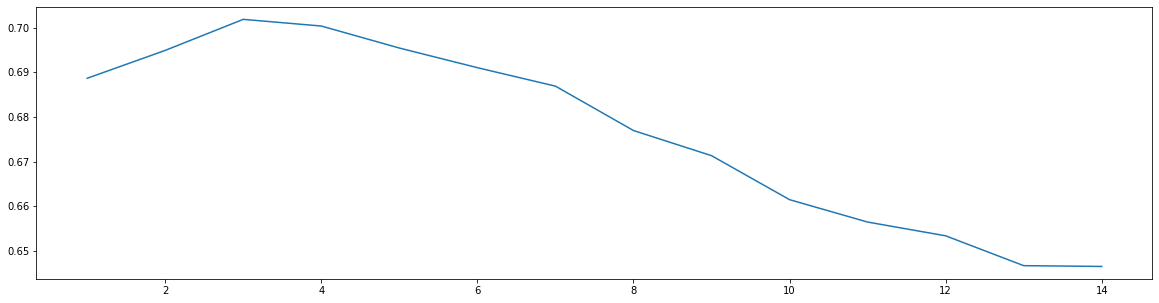

3


In [35]:
ScoreAll = []
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
for i in range(1,15):
    clf = DecisionTreeClassifier(criterion=best_criterion,max_depth=i,random_state=1)
    score = cross_val_score(clf, X_train_std_fs_cv, Y_train_std_fs_cv, cv=cv).mean()
    ScoreAll.append([i, score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:, 1]))[0][0]
print("Best max_depth:", ScoreAll[max_score])
plt.figure(figsize=[20, 5])
plt.plot(ScoreAll[:, 0], ScoreAll[:, 1])
plt.show()

best_max_depth=int(ScoreAll[max_score][0])
print(best_max_depth)

Best min_samples_split: [2.         0.70184697]


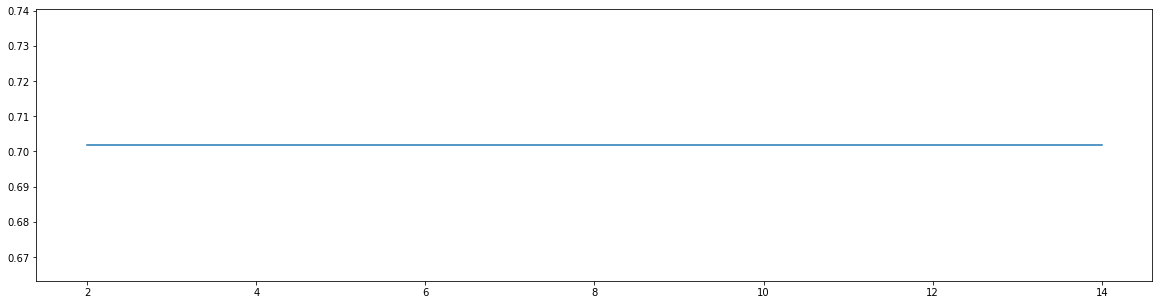

2


In [36]:
ScoreAll = []
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
for i in range(2,15):
    clf = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, min_samples_split=i, random_state=1)
    score = cross_val_score(clf, X_train_std_fs_cv, Y_train_std_fs_cv, cv=cv).mean()
    ScoreAll.append([i, score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:, 1]))[0][0]
print("Best min_samples_split:", ScoreAll[max_score])
plt.figure(figsize=[20, 5])
plt.plot(ScoreAll[:, 0], ScoreAll[:, 1])
plt.show()

best_min_samples_split=int(ScoreAll[max_score][0])
print(best_min_samples_split)

Best min_samples_leaf: [2.         0.70184697]


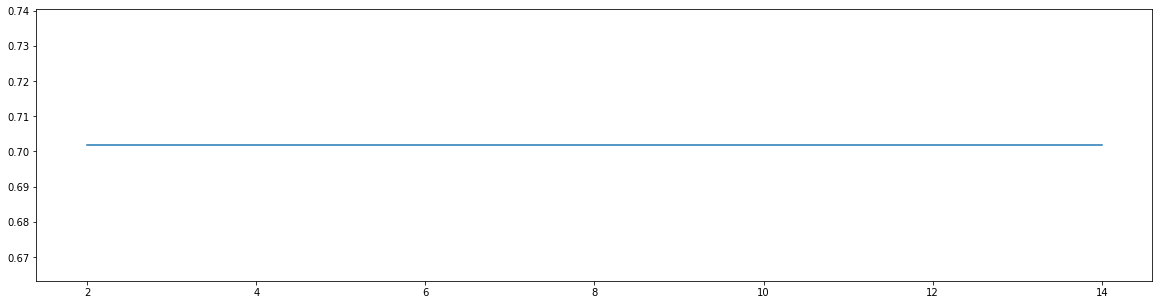

2


In [37]:
ScoreAll = []
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=1)
for i in range(2,15):
    clf = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, min_samples_split=best_min_samples_split,min_samples_leaf=i, random_state=1)
    score = cross_val_score(clf, X_train_std_fs_cv, Y_train_std_fs_cv, cv=cv).mean()
    ScoreAll.append([i, score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:, 1]))[0][0]
print("Best min_samples_leaf:", ScoreAll[max_score])
plt.figure(figsize=[20, 5])
plt.plot(ScoreAll[:, 0], ScoreAll[:, 1])
plt.show()

best_min_samples_leaf=int(ScoreAll[max_score][0])
print(best_min_samples_leaf)

In [38]:
tree_std_fs_cv=DecisionTreeClassifier(criterion=best_criterion,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_depth=best_max_depth,random_state=1)
tree_std_fs_cv.fit(X_train_std_fs_cv,Y_train_std_fs_cv)
tree_std_fs_cv
Y_pred_tree_std_fs_cv = tree_std_fs_cv.predict(X_test_std_fs_cv)

conf_tree_std_fs_cv=pd.DataFrame(confusion_matrix(Y_test_std_fs_cv,Y_pred_tree_std_fs_cv),
            columns = ['predicted0','predicted1'],
            index = ['true0','true1'])
print(conf_tree_std_fs_cv)
print(classification_report(Y_test_std_fs_cv,Y_pred_tree_std_fs_cv))

       predicted0  predicted1
true0         426         138
true1         228         345
              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70       564
         1.0       0.71      0.60      0.65       573

    accuracy                           0.68      1137
   macro avg       0.68      0.68      0.68      1137
weighted avg       0.68      0.68      0.68      1137



##4.3 logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(dfStandardized, class_col, test_size=0.2, random_state=1)
y_test_lr.reset_index(drop=True)
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_lr, y_train_lr)
y_pred_logreg = logreg.predict(X_test_lr)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test_lr, y_test_lr)))

print(classification_report(y_test_lr,y_pred_logreg))

Accuracy of logistic regression classifier on test set: 0.67810
              precision    recall  f1-score   support

         0.0       0.66      0.72      0.69       564
         1.0       0.70      0.64      0.67       573

    accuracy                           0.68      1137
   macro avg       0.68      0.68      0.68      1137
weighted avg       0.68      0.68      0.68      1137



##4.4 SVM

In [40]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(dfStandardized, class_col, test_size=0.2, random_state=1)
svm = SVC(C=10.0)
svm.fit(X_train_svm, y_train_svm)

yPredSVM = svm.predict(X_test_svm)
conf = pd.DataFrame(confusion_matrix(y_test_svm, yPredSVM),
                   columns = ['Predicted 0', 'Predicted 1'],
                   index = ['True 0', 'True 1'])

print(conf)

print(classification_report(y_test_svm, yPredSVM))

        Predicted 0  Predicted 1
True 0          421          143
True 1          202          371
              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71       564
         1.0       0.72      0.65      0.68       573

    accuracy                           0.70      1137
   macro avg       0.70      0.70      0.70      1137
weighted avg       0.70      0.70      0.70      1137



##4.5 Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(dfStandardized, class_col, test_size=0.2, random_state=1)

nb=GaussianNB()
nb.fit(X_train_NB,y_train_NB)
y_pred_nb_gaussian=nb.predict(X_test_NB)
conf=pd.DataFrame(
    confusion_matrix(y_test_NB,y_pred_nb_gaussian),
    columns=['Predict 0','Predict 1'],
    index=['True 0','True 1'])

print(conf)
print()
print(classification_report(y_test_NB,y_pred_nb_gaussian))
print()

        Predict 0  Predict 1
True 0        484         80
True 1        328        245

              precision    recall  f1-score   support

         0.0       0.60      0.86      0.70       564
         1.0       0.75      0.43      0.55       573

    accuracy                           0.64      1137
   macro avg       0.67      0.64      0.62      1137
weighted avg       0.68      0.64      0.62      1137


